In [31]:
#imports
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import *


In [32]:
#define how to get the phase
c=299792458

def get_phase(omega,Eomega, lambda0):
    #retrieves phase and subtracts the arbitrary phase at omega0
    om0 = 2*np.pi*c/lambda0 #central frequency
    om0_idx = np.argmin(np.abs(omega-om0))
 
    domega = omega[2] - omega[1]
    tau = np.pi/domega
    phase_raw = np.angle(Eomega)
    phase = np.unwrap(phase_raw - omega*tau)
    phase=phase*(-1)#optics convention
    phase -= phase[om0_idx]#subtract arbitrary phase offset
    return phase

In [33]:
#define inverse fourier transform
def f_to_t_irfft(f, Ef):
    """
    Input of f and Ef
    Returns t, Et
    """
    Et = irfft(Ef)
    N = len(Ef) # Number of points
    #t = 1/f
    df=np.abs(f[1]-f[0])#smallest frequency difference gives inverse of duration
    T=1/df#overall duration
    t=np.linspace(-T/2,T/2,len(Et))#construct time axis
    return t,Et

In [34]:
#import from csv with columns omega, Eomega_real, Eomega_imag
filepath="C:\\Users\\ML\\OneDrive - Imperial College London\\MSci_Project\\code\\Synth\\Optimising-Field-Synthesiser\\HCF sim\\Python\\Test_Data2.csv"
import pandas as pd
df_0 = pd.read_csv(filepath,skipinitialspace=True)
omega_df=df_0.iloc[210:250,0]

Eomega_real_df=df_0.iloc[210:250,1]
Eomega_imag_df=df_0.iloc[210:250,2]
omega=np.array([])
Eomega=np.array([])

#append to new arrays to prevent irfft error
for i in range(len(omega_df)):
    omega=np.append(omega,omega_df[210+i])
    Eomega=np.append(Eomega,Eomega_real_df[210+i]+1j*Eomega_imag_df[210+i])


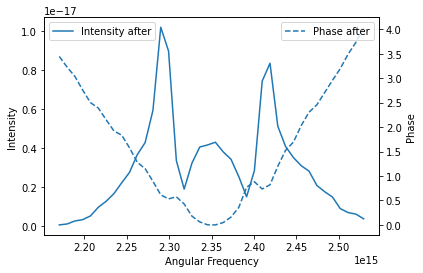

In [35]:
#get the phase and plot intensity envelope and phase
lambda0=800e-9
phase=get_phase(omega,Eomega,lambda0)

#plot
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.set_xlabel('Angular Frequency')
ax2.set_ylabel('Phase')
ax1.set_ylabel('Intensity')

ax2.plot(omega, phase, '--', label='Phase after')
ax1.plot(omega, np.abs(Eomega)**2, label='Intensity after')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

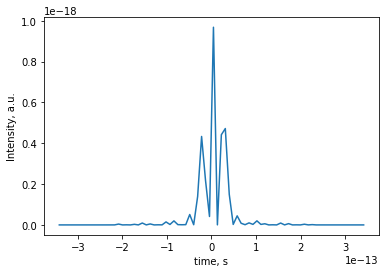

In [36]:
#Fourier transform 

t,Et=f_to_t_irfft(omega/(2*np.pi),Eomega)

#plot
plt.plot(t,np.abs(Et)**2)
plt.xlabel("time, s")
plt.ylabel("Intensity, a.u.")
plt.show()